In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, FloatSlider, VBox, fixed, interactive_output
from IPython.display import display
import ipywidgets as widgets
from matplotlib.animation import FuncAnimation
from PIL import Image
from matplotlib.widgets import Slider
import sympy as sp
from scipy.integrate import quad

In [93]:
### Все работы выполнены с использованием книги Э.Г.Позняк, Е.В.Шикин, Дифференциальная геометрия: Первое знакомство.

### Построим простую поверхность, например, параболоид, с помощью параметрических уравнений. Параболоид можно задать следующим образом:

$$
\begin{cases}
x = u \\
y = v \\
z = u^2 + v^2
\end{cases}
$$

Здесь $u$ и $v$ - параметры, определяющие положение точки на поверхности.

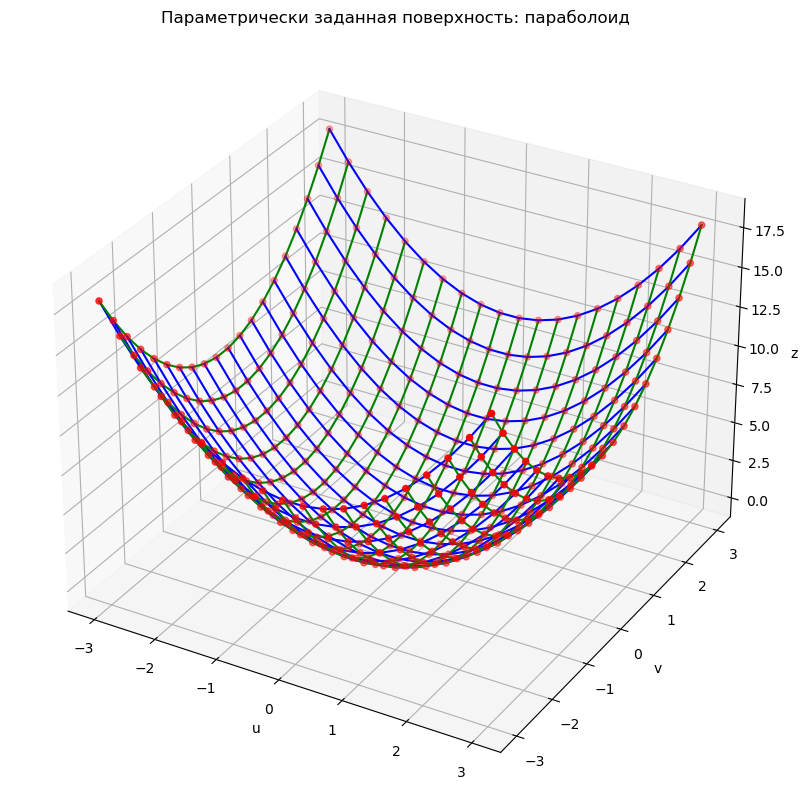

In [94]:

# Определение диапазона параметров
u = np.linspace(-3, 3, 20)
v = np.linspace(-3, 3, 20)
U, V = np.meshgrid(u, v)

# Параметрические уравнения поверхности
X = U
Y = V
Z = U**2 + V**2

# Создание 3D-графика
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Отображение точек поверхности
ax.scatter(X, Y, Z, color='red')

# Соединение точек линиями
for i in range(len(u)):
    ax.plot(X[i, :], Y[i, :], Z[i, :], color='blue')  # Горизонтальные линии
    ax.plot(X[:, i], Y[:, i], Z[:, i], color='green')  # Вертикальные линии

# Настройка осей
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('z')
ax.set_title('Параметрически заданная поверхность: параболоид')

# Отображение графика
plt.show()


### Параметрическая поверхность с деформацией

Добавим параметр деформации $t$, который изменяет форму поверхности. Пусть $t$ варьируется от 0 до 1, и при $t = 0$ поверхность будет параболоидом, а при $t = 1$ — гиперболоидом однополостным. Мы можем использовать следующий набор уравнений для параметрической поверхности:

$$
\begin{cases}
x = u \\
y = v \\
z = t(u^2 + v^2) + (1 - t)(u^2 - v^2)
\end{cases}
$$

Когда $t = 0$, получаем параболоид $z = u^2 - v^2$, а когда $t = 1$, получаем гиперболоид $z = u^2 + v^2$.

In [116]:

# # Определение диапазона параметров
# u = np.linspace(-3, 3, 20)
# v = np.linspace(-3, 3, 20)
# U, V = np.meshgrid(u, v)

# def plot_surface(t=0.1, elev=30, azim=30):
#     # Параметрические уравнения поверхности с деформацией
#     X = U
#     Y = V
#     Z = t * (U**2 + V**2) + (1 - t) * (U**2 - V**2)
    
#     # Создание 3D-графика
#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111, projection='3d')

#     # Отображение точек поверхности
#     ax.scatter(X, Y, Z, color='red')

#     # Соединение точек линиями
#     for i in range(len(u)):
#         ax.plot(X[i, :], Y[i, :], Z[i, :], color='blue')  # Горизонтальные линии
#         ax.plot(X[:, i], Y[:, i], Z[:, i], color='green')  # Вертикальные линии

#     # Настройка осей
#     ax.set_xlabel('u')
#     ax.set_ylabel('v')
#     ax.set_zlabel('z')
#     ax.set_title(f'Параметрически заданная поверхность: деформация t = {t}')

#     # Установка углов обзора
#     ax.view_init(elev=elev, azim=azim)
    
#     plt.show()

# # Создание ползунков для изменения параметров
# t_slider = FloatSlider(min=0, max=1, step=0.01, value=0.1, description='Deformation t')
# elev_slider = FloatSlider(min=0, max=90, step=1, value=30, description='Elevation')
# azim_slider = FloatSlider(min=0, max=360, step=1, value=30, description='Azimuth')

# # Создание интерактивного виджета
# interactive_plot = interactive(plot_surface, t=t_slider, elev=elev_slider, azim=azim_slider)

# # Отображение интерактивного виджета без дублирования ползунков
# display(VBox([interactive_plot]))


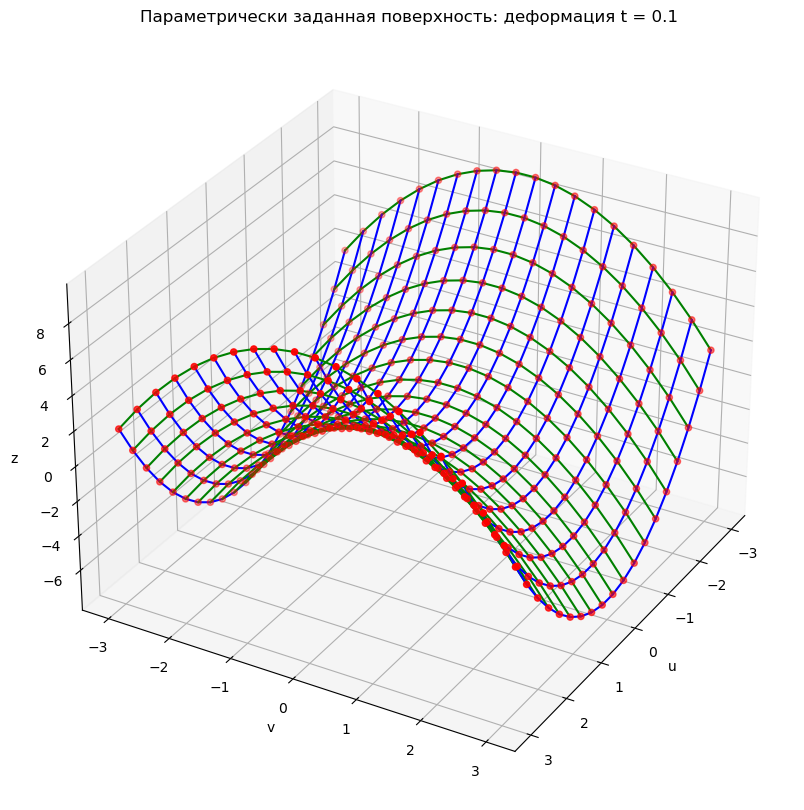

In [117]:


# Определение диапазона параметров
u = np.linspace(-3, 3, 20)
v = np.linspace(-3, 3, 20)
U, V = np.meshgrid(u, v)

def plot_surface(t=0.1, elev=30, azim=30):
    # Параметрические уравнения поверхности с деформацией
    X = U
    Y = V
    Z = t * (U**2 + V**2) + (1 - t) * (U**2 - V**2)
    
    # Создание 3D-графика
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Отображение точек поверхности
    ax.scatter(X, Y, Z, color='red')

    # Соединение точек линиями
    for i in range(len(u)):
        ax.plot(X[i, :], Y[i, :], Z[i, :], color='blue')  # Горизонтальные линии
        ax.plot(X[:, i], Y[:, i], Z[:, i], color='green')  # Вертикальные линии

    # Настройка осей
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('z')
    ax.set_title(f'Параметрически заданная поверхность: деформация t = {t}')

    # Установка углов обзора
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()

# Вызов функции с конкретными параметрами
plot_surface(t=0.1, elev=30, azim=30)


Для построения цилиндрической поверхности со спиралевидной направляющей на прямоугольнике $P = \{(u,v) \mid 0 < u < 4\pi, 0 < v < 1\}$ можно использовать следующий набор параметрических уравнений:

$$
\begin{cases}
x = u \cos(u) \\
y = u \sin(u) \\
z = v
\end{cases}
$$

In [96]:


# # Функция для построения 3D-графика
# def plot_surface(max_u=4 * np.pi, max_v=1, elevation=30, azimuth=30):
#     # Определение диапазона параметров
#     u = np.linspace(0, max_u, 40)
#     v = np.linspace(0, max_v, 40)
#     U, V = np.meshgrid(u, v)

#     # Параметрические уравнения поверхности
#     X = U * np.cos(U)
#     Y = U * np.sin(U)
#     Z = V

#     # Создание 3D-графика
#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111, projection='3d')

#     # Соединение точек линиями
#     for i in range(len(v)):
#         ax.plot(X[i, :], Y[i, :], Z[i, :], color='limegreen')  # Горизонтальные линии
#     for i in range(len(u)):
#         ax.plot(X[:, i], Y[:, i], Z[:, i], color='limegreen')   # Вертикальные линии

#     # Настройка осей
#     ax.set_xlabel('u')
#     ax.set_ylabel('v')
#     ax.set_zlabel('z')
#     ax.set_title('Цилиндрическая поверхность со спиралевидной направляющей')

#     # Установка углов обзора
#     ax.view_init(elev=elevation, azim=azimuth)

#     # Отображение графика
#     plt.show()

# # Создание ползунков для изменения параметров
# max_u_slider = FloatSlider(min=0, max=8 * np.pi, step=0.1, value=4 * np.pi, description='Max u')
# max_v_slider = FloatSlider(min=0, max=2, step=0.1, value=1, description='Max v')
# elevation_slider = FloatSlider(min=0, max=90, step=1, value=30, description='Elevation')
# azimuth_slider = FloatSlider(min=-180, max=180, step=1, value=30, description='Azimuth')

# # Создание интерактивного виджета
# interactive_plot = interactive(plot_surface, 
#                                 max_u=max_u_slider,
#                                 max_v=max_v_slider,
#                                 elevation=elevation_slider,
#                                 azimuth=azimuth_slider)

# # Отображение интерактивного виджета
# display(VBox([interactive_plot]))


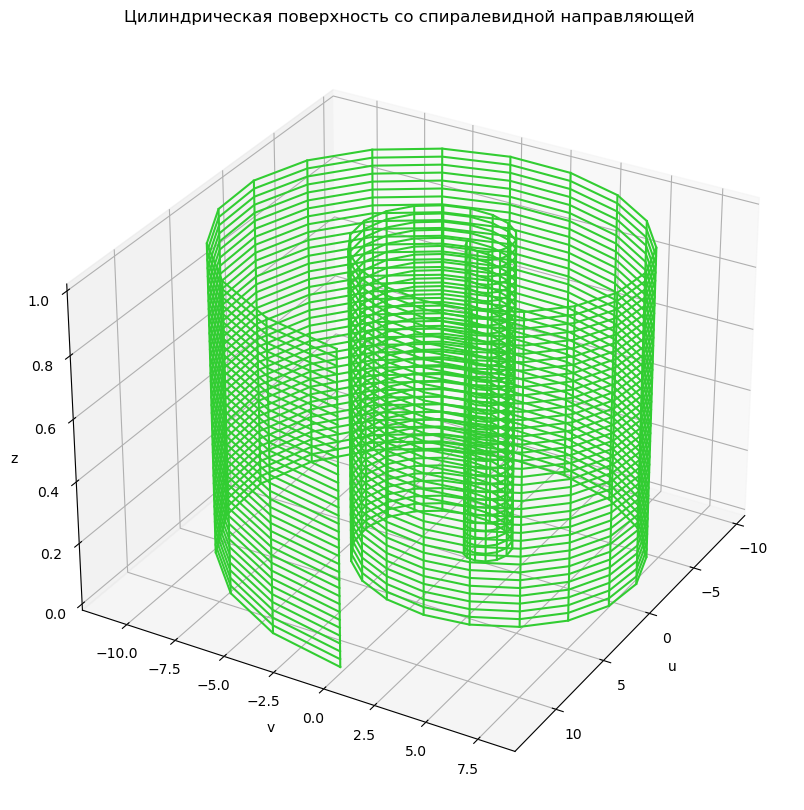

In [118]:

# Функция для построения 3D-графика
def plot_surface(max_u=4 * np.pi, max_v=1, elevation=30, azimuth=30):
    # Определение диапазона параметров
    u = np.linspace(0, max_u, 40)
    v = np.linspace(0, max_v, 40)
    U, V = np.meshgrid(u, v)

    # Параметрические уравнения поверхности
    X = U * np.cos(U)
    Y = U * np.sin(U)
    Z = V

    # Создание 3D-графика
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Соединение точек линиями
    for i in range(len(v)):
        ax.plot(X[i, :], Y[i, :], Z[i, :], color='limegreen')  # Горизонтальные линии
    for i in range(len(u)):
        ax.plot(X[:, i], Y[:, i], Z[:, i], color='limegreen')   # Вертикальные линии

    # Настройка осей
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('z')
    ax.set_title('Цилиндрическая поверхность со спиралевидной направляющей')

    # Установка углов обзора
    ax.view_init(elev=elevation, azim=azimuth)

    # Отображение графика
    plt.show()

# Вызов функции с конкретными параметрами
plot_surface(max_u=4 * np.pi, max_v=1, elevation=30, azimuth=30)


In [97]:

# # Определение диапазона параметров
# u = np.linspace(0, np.pi/2, 20)
# v = np.linspace(0, 2*np.pi, 20)
# U, V = np.meshgrid(u, v)

# def plot_upper_half_sphere_lines(elevation=30, azimuth=30):
#     # Параметрические уравнения верхней полусферы
#     R = 1  # Фиксированный радиус
#     X = R * np.cos(U) * np.cos(V)
#     Y = R * np.cos(U) * np.sin(V)
#     Z = R * np.sin(U)
    
#     # Создание 3D-графика
#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111, projection='3d')

#     # Отображение точек поверхности
#     ax.scatter(X, Y, Z, color='black')

#     # Соединение точек линиями
#     for i in range(len(u)):
#         ax.plot(X[i, :], Y[i, :], Z[i, :], color='black')  # Горизонтальные линии
#         ax.plot(X[:, i], Y[:, i], Z[:, i], color='darkviolet')  # Вертикальные линии

#     # Настройка осей
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title('Верхняя полусфера радиуса R=1')

#     # Установка углов обзора
#     ax.view_init(elev=elevation, azim=azimuth)

#     plt.show()

# # Создание ползунков для изменения углов
# elevation_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Elevation')
# azimuth_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=30, description='Azimuth')

# # Создание интерактивного виджета
# interactive_plot = interactive(plot_upper_half_sphere_lines, 
#                                 elevation=elevation_slider,
#                                 azimuth=azimuth_slider)

# # Отображение интерактивного виджета
# display(VBox([interactive_plot]))


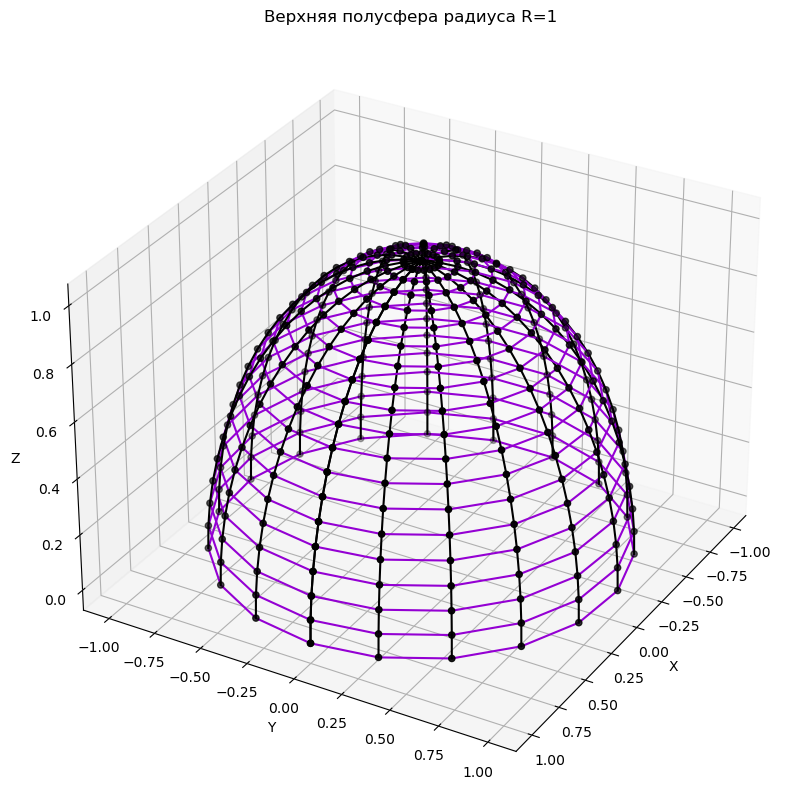

In [119]:


# Определение диапазона параметров
u = np.linspace(0, np.pi / 2, 20)
v = np.linspace(0, 2 * np.pi, 20)
U, V = np.meshgrid(u, v)

def plot_upper_half_sphere_lines(elevation=30, azimuth=30):
    # Параметрические уравнения верхней полусферы
    R = 1  # Фиксированный радиус
    X = R * np.cos(U) * np.cos(V)
    Y = R * np.cos(U) * np.sin(V)
    Z = R * np.sin(U)
    
    # Создание 3D-графика
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Отображение точек поверхности
    ax.scatter(X, Y, Z, color='black')

    # Соединение точек линиями
    for i in range(len(u)):
        ax.plot(X[i, :], Y[i, :], Z[i, :], color='black')  # Горизонтальные линии
        ax.plot(X[:, i], Y[:, i], Z[:, i], color='darkviolet')  # Вертикальные линии

    # Настройка осей
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Верхняя полусфера радиуса R=1')

    # Установка углов обзора
    ax.view_init(elev=elevation, azim=azimuth)

    plt.show()

# Вызов функции для построения графика с фиксированными углами
plot_upper_half_sphere_lines(elevation=30, azimuth=30)


Тор (или тороидальная поверхность) можно получить, вращая окружность вокруг оси, находящейся в одной плоскости с окружностью, но не пересекающей её. Пусть окружность радиуса $r$ вращается вокруг оси $z$, находящейся на расстоянии $R$ от центра окружности. Параметрические уравнения тора будут следующими:

$$
\begin{cases}
x(\theta, \phi) = (R + r \cos \theta) \cos \phi \\
y(\theta, \phi) = (R + r \cos \theta) \sin \phi \\
z(\theta, \phi) = r \sin \theta
\end{cases}
$$

где $\theta$ и $\phi$ — угловые параметры:

- $\theta$ (угол внутри малой окружности) принимает значения от $0$ до $2\pi$.
- $\phi$ (угол вокруг большой окружности) принимает значения от $0$ до $2\pi$.

In [103]:


# # Определение диапазона параметров
# theta = np.linspace(0, 2 * np.pi, 30)
# phi = np.linspace(0, 2 * np.pi, 30)
# Theta, Phi = np.meshgrid(theta, phi)

# def plot_torus_lines(R=1, r=0.3, azimuth=30, elevation=30):
#     # Параметрические уравнения тора
#     X = (R + r * np.cos(Theta)) * np.cos(Phi)
#     Y = (R + r * np.cos(Theta)) * np.sin(Phi)
#     Z = r * np.sin(Theta)
    
#     # Создание 3D-графика
#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111, projection='3d')

#     # Отображение точек поверхности
#     ax.scatter(X, Y, Z, color='black')

#     # Соединение точек линиями
#     for i in range(len(theta)):
#         ax.plot(X[i, :], Y[i, :], Z[i, :], color='black')  # Горизонтальные линии
#         ax.plot(X[:, i], Y[:, i], Z[:, i], color='green')  # Вертикальные линии

#     # Установка углов обзора
#     ax.view_init(elev=elevation, azim=azimuth)

#     # Настройка осей
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')
#     ax.set_title(f'Тор с радиусом R={R} и малым радиусом r={r}')

#     plt.show()

# # Создание ползунков для изменения радиусов и углов
# R_slider = widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1, description='Большой радиус R')
# r_slider = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.3, description='Малый радиус r')
# azimuth_slider = widgets.FloatSlider(min=-180, max=180, step=1, value=30, description='Азимут')
# elevation_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Наклон')

# # Создание интерактивного виджета без дублирования
# interactive_plot = interactive_output(plot_torus_lines, {
#     'R': R_slider,
#     'r': r_slider,
#     'azimuth': azimuth_slider,
#     'elevation': elevation_slider
# })

# # Отображение интерактивного виджета
# VBox([R_slider, r_slider, azimuth_slider, elevation_slider, interactive_plot])


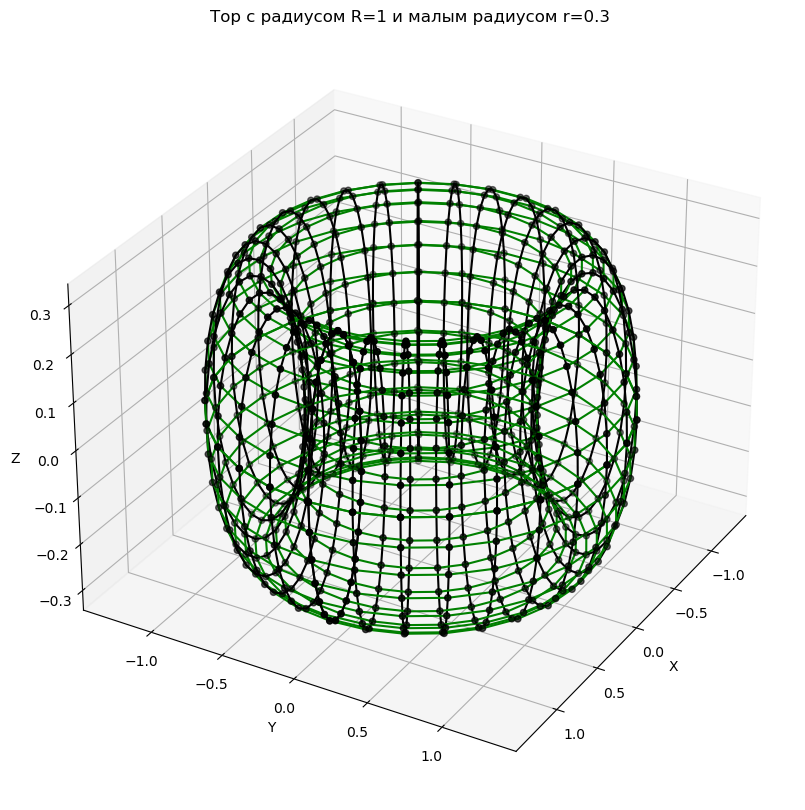

In [120]:


# Определение диапазона параметров
theta = np.linspace(0, 2 * np.pi, 30)
phi = np.linspace(0, 2 * np.pi, 30)
Theta, Phi = np.meshgrid(theta, phi)

def plot_torus_lines(R=1, r=0.3, azimuth=30, elevation=30):
    # Параметрические уравнения тора
    X = (R + r * np.cos(Theta)) * np.cos(Phi)
    Y = (R + r * np.cos(Theta)) * np.sin(Phi)
    Z = r * np.sin(Theta)
    
    # Создание 3D-графика
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Отображение точек поверхности
    ax.scatter(X, Y, Z, color='black')

    # Соединение точек линиями
    for i in range(len(theta)):
        ax.plot(X[i, :], Y[i, :], Z[i, :], color='black')  # Горизонтальные линии
        ax.plot(X[:, i], Y[:, i], Z[:, i], color='green')  # Вертикальные линии

    # Установка углов обзора
    ax.view_init(elev=elevation, azim=azimuth)

    # Настройка осей
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Тор с радиусом R={R} и малым радиусом r={r}')

    plt.show()

# Вызов функции для построения графика с фиксированными параметрами
plot_torus_lines(R=1, r=0.3, azimuth=30, elevation=30)


### Гомеоморфизм катеноида и геликоида

Катеноид и геликоид являются примечательными примерами минимальных поверхностей, что означает, что они минимизируют свою площадь для заданной границы. Эти поверхности также являются гомеоморфными, что означает, что существует непрерывное взаимно-однозначное отображение между ними, которое имеет непрерывное обратное отображение.

#### Катеноид

Катеноид — это минимальная поверхность, образованная вращением цепной линии вокруг оси. Его параметрическое уравнение:

$$
\begin{aligned}
x(u, v) &= \cosh(u) \cos(v), \\
y(u, v) &= \cosh(u) \sin(v), \\
z(u, v) &= u,
\end{aligned}
$$

где $u \in \mathbb{R}$ и $v \in [0, 2\pi]$.

#### Геликоид

Геликоид — это минимальная поверхность, образованная скручиванием плоскости вдоль оси. Его параметрическое уравнение:

$$
\begin{aligned}
x(u, v) &= u \cos(v), \\
y(u, v) &= u \sin(v), \\
z(u, v) &= v,
\end{aligned}
$$

где $u \in \mathbb{R}$ и $v \in [0, 2\pi]$.

#### Гомеоморфизм

Катеноид и геликоид являются гомеоморфными, поскольку существует непрерывное преобразование, которое может превратить одну поверхность в другую без разрыва или сшивания. Примером такого преобразования является интерполяция между их параметрическими уравнениями:

$$
\begin{aligned}
x(t, u, v) &= (1 - t) \cosh(u) \cos(v) + t u \cos(v), \\
y(t, u, v) &= (1 - t) \cosh(u) \sin(v) + t u \sin(v), \\
z(t, u, v) &= (1 - t) u + t v,
\end{aligned}
$$

где $t \in [0, 1]$. При $t = 0$ это катеноид, а при $t = 1$ это геликоид. Такое непрерывное преобразование демонстрирует, что катеноид и геликоид имеют одинаковую топологическую структуру.



Этот код создает анимацию, демонстрирующую гомеоморфизм между катеноидом и геликоидом, иллюстрируя их топологическую эквивалентность.

In [ ]:
### Забавная анимация,где геликоид превращается в катеноид и обратно,гитхаб конечно "скушает" эту анимацию,но я все равно оставлю ее здесь.
## Это конечно же только один из примеров гомеоморфности,в википедии например есть анимация того как бублик превращается в чашку:D
# Параметры поверхности
u_min, u_max = -2, 2
v_min, v_max = 0, 2 * np.pi
num_u, num_v = 50, 50

u = np.linspace(u_min, u_max, num_u)
v = np.linspace(v_min, v_max, num_v)
u, v = np.meshgrid(u, v)

# Функция для создания промежуточной поверхности между катеноидом и геликоидом
def morph_surface(t):
    x = (1 - t) * np.cosh(u) * np.cos(v) + t * u * np.cos(v)
    y = (1 - t) * np.cosh(u) * np.sin(v) + t * u * np.sin(v)
    z = (1 - t) * u + t * v
    return x, y, z

# Создание фигуры и осей
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-2, 2])
ax.set_box_aspect([1, 1, 1])  # Квадратный бокс для правильного соотношения сторон
ax.axis('off')


# Установим начальные углы для обзора и сместим камеру по оси Z
init_elev = 65  # Угол возвышения (меньше для опускания фигуры)
init_azim = 45  # Угол азимута
z_shift = -5  # Сдвиг по оси Z для опускания фигуры

# Анимация
frames = 120
images = []
def animate(i):
    ax.cla()  # Очистка предыдущего кадра
    t = np.abs(np.sin(2 * np.pi * i / frames))  # Используем синусоидальную функцию для плавного перехода
    x, y, z = morph_surface(t)
    ax.plot_surface(x, y, z, color='turquoise', rstride=5, cstride=5, alpha=0.7)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-2, 2])
    ax.set_box_aspect([1, 1, 1])
    ax.axis('off')
    ax.view_init(elev=init_elev, azim=init_azim)  # Установка углов обзора
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(Image.fromarray(image))

ani = FuncAnimation(fig, animate, frames=frames, interval=50)

# Сохранение анимации в виде GIF
ani.save("catenoid_helicoid.gif", writer='imagemagick', fps=24)


### Шаг 1: Параметризация поверхности

У нас есть поверхность $S$, заданная параметрическими уравнениями:

$$
x = u, \quad y = \sin(u), \quad z = v
$$

### Шаг 2: Векторы, образующие касательную плоскость

Найдём частные производные параметризации по $u$ и $v$:

$$
\mathbf{r}_u = \frac{\partial \mathbf{r}}{\partial u} = \left( \frac{\partial x}{\partial u}, \frac{\partial y}{\partial u}, \frac{\partial z}{\partial u} \right) = (1, \cos(u), 0)
$$

$$
\mathbf{r}_v = \frac{\partial \mathbf{r}}{\partial v} = \left( \frac{\partial x}{\partial v}, \frac{\partial y}{\partial v}, \frac{\partial z}{\partial v} \right) = (0, 0, 1)
$$

### Шаг 3: Первая квадратичная форма

Теперь вычислим компоненты первой квадратичной формы $E$, $F$ и $G$:

$$
E = \mathbf{r}_u \cdot \mathbf{r}_u = 1 + \cos^2(u)
$$

$$
F = \mathbf{r}_u \cdot \mathbf{r}_v = 0
$$

$$
G = \mathbf{r}_v \cdot \mathbf{r}_v = 1
$$

Таким образом, первая квадратичная форма принимает вид:

$$
ds^2 = E \, du^2 + 2F \, du \, dv + G \, dv^2 = (1 + \cos^2(u)) \, du^2 + dv^2
$$

### Шаг 4: Замена переменных

Введем новые координаты $X$ и $Y$, где:

$$
X = \int_0^u \sqrt{1 + \cos^2(\xi)} \, d\xi, \quad Y = v
$$

В новых координатах первая квадратичная форма станет:

$$
ds^2 = dX^2 + dY^2
$$

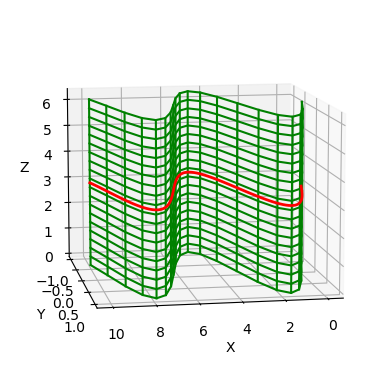

In [113]:

### Построение цилиндрической поверхности с синусоидой в качестве напрявляющей.

# Задаем диапазоны для параметров u и v
u_vals = np.linspace(0, 10, 20)      # диапазон для u
v_vals = np.linspace(0, 2*np.pi, 20) # диапазон для v

# Создаем сетки u и v
u, v = np.meshgrid(u_vals, v_vals)

# Вычисляем координаты x, y и z
x = u
y = np.sin(u)
z = v

# Создаем фигуру и оси
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Рисуем линии вдоль u
lines_u = [ax.plot(x[i, :], y[i, :], z[i, :], color='green')[0] for i in range(len(v_vals))]

# Рисуем линии вдоль v
lines_v = [ax.plot(x[:, j], y[:, j], z[:, j], color='green')[0] for j in range(len(u_vals))]

# Рисуем синусоидальную направляющую
u_sine = np.linspace(0, 10, 100)
y_sine = np.sin(u_sine)
z_sine = np.ones_like(u_sine) * np.pi # установить z посередине диапазона v
line_sine = ax.plot(u_sine, y_sine, z_sine, color='red', linewidth=2)[0] # синусоидальная линия посередине поверхности

# Устанавливаем метки осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка углов обзора
ax.view_init(elev=10, azim=80)

# Отображаем график
plt.show()


In [112]:

### Получается исходная первая квадратичная форма без упрощений

# Определяем символы
u, v = sp.symbols('u v')

# Выражение для E
E_expr = 1 + sp.cos(u)**2

# Интегрируем E для вычисления X(u)
integrand = sp.sqrt(E_expr)
X_expr = sp.integrate(integrand, (u, 0, u))

# Производная dX/du
dX_du = sp.diff(X_expr, u).simplify()

# Выражаем первую квадратичную форму в новых координатах
ds_squared_new = dX_du**2 * sp.diff(u)**2 + sp.diff(v)**2

# Выводим результаты
print("Первая квадратичная форма в исходных координатах:")
print(f"ds^2 = ({E_expr}) du^2 + dv^2")




Первая квадратичная форма в исходных координатах:
ds^2 = (cos(u)**2 + 1) du^2 + dv^2


In [111]:

### Здесь с упрощением,вариант отличен от книжного в силу того,что программа ВЫЧИСЛЯЕТ напрямую,а не ограничивается подстановкой X и Y.
# Определяем символы
u, v = sp.symbols('u v')

# Выражение для E
E_expr = 1 + sp.cos(u)**2

# Интегрируем E для вычисления X(u)
integrand = sp.sqrt(E_expr)
X_expr = sp.integrate(integrand, (u, 0, u))

# Производная dX/du
dX_du = sp.diff(X_expr, u).simplify()

# Проверяем результат производной
dX = sp.sqrt(1 + sp.cos(u)**2) * sp.diff(u)

# Подстановка производной для выражения ds^2
du_sub = dX / sp.sqrt(1 + sp.cos(u)**2)

# Первая квадратичная форма в новых координатах
ds_squared_new = (1 + sp.cos(u)**2) * (du_sub)**2 + sp.diff(v)**2

# Упрощаем выражение
ds_squared_new_simplified = ds_squared_new.simplify()

# Выводим результаты
print("Первая квадратичная форма в исходных координатах:")
print(f"ds^2 = ({E_expr}) du^2 + dv^2")

print("\nПереход к новым параметрам:")
print("X = ∫(0,u) sqrt(1 + cos^2(ξ)) dξ")
print("Y = v")

print("\nПроизводная dX/du:")
print(f"dX/du = {dX_du}")

print("\nПервая квадратичная форма в новых координатах:")
print(f"ds^2 = {ds_squared_new_simplified}")


Первая квадратичная форма в исходных координатах:
ds^2 = (cos(u)**2 + 1) du^2 + dv^2

Переход к новым параметрам:
X = ∫(0,u) sqrt(1 + cos^2(ξ)) dξ
Y = v

Производная dX/du:
dX/du = sqrt(cos(u)**2 + 1)

Первая квадратичная форма в новых координатах:
ds^2 = cos(u)**2 + 2


#### P.S.В книге не было хорошего примера с второй квадратичной формой,поэтому я взяла пример из сборника задач по дифференциальной геометрии(А.С.Феденко),задача 717. 

### Вычисления второй квадратичной формы

#### Параметризация поверхности

$x = R \cos(u) \cos(v)$

$y = R \cos(u) \sin(v)$

$z = R \sin(u)$

#### Частные производные первого порядка

$\mathbf{r}_u = \left[ -R \sin(u) \cos(v), -R \sin(u) \sin(v), R \cos(u) \right]$

$\mathbf{r}_v = \left[ -R \cos(u) \sin(v), R \cos(u) \cos(v), 0 \right]$

#### Первая квадратичная форма

$E = \mathbf{r}_u \cdot \mathbf{r}_u = R^2$

$F = \mathbf{r}_u \cdot \mathbf{r}_v = 0$

$G = \mathbf{r}_v \cdot \mathbf{r}_v = R^2 \cos^2(u)$

#### Вектор нормали

$\mathbf{n} = \frac{\mathbf{r}_u \times \mathbf{r}_v}{|\mathbf{r}_u \times \mathbf{r}_v|} = \frac{R^2 \cos(u) \left[ \cos(u) \cos(v), \cos(u) \sin(v), \sin(u) \right]}{R^2 \cos(u)} = \left[ \cos(u) \cos(v), \cos(u) \sin(v), \sin(u) \right]$

#### Частные производные второго порядка

$\mathbf{r}_{uu} = \left[ -R \cos(u) \cos(v), -R \cos(u) \sin(v), -R \sin(u) \right]$

$\mathbf{r}_{uv} = \left[ R \sin(u) \sin(v), -R \sin(u) \cos(v), 0 \right]$

$\mathbf{r}_{vv} = \left[ -R \cos(u) \cos(v), -R \cos(u) \sin(v), 0 \right]$

#### Вторая квадратичная форма

$L = \mathbf{r}_{uu} \cdot \mathbf{n} = R$

$M = \mathbf{r}_{uv} \cdot \mathbf{n} = 0$

$N = \mathbf{r}_{vv} \cdot \mathbf{n} = R \cos^2(u)$

#### Формирование второй квадратичной формы

$I_2 = L \, du^2 + 2M \, du \, dv + N \, dv^2 = R \, du^2 + R \cos^2(u) \, dv^2$

#### Итоговое выражение второй квадратичной формы

$I_2 = R \, du^2 + R \cos^2(u) \, dv^2$


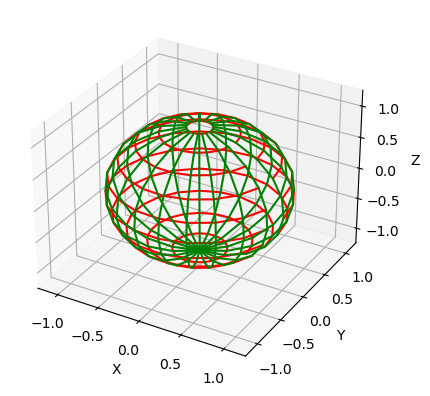

In [110]:


R = 1 # Радиус сферы

u = np.arange(-np.pi / 2, np.pi / 2, 0.3) # Широта
v = np.arange(0, 2 * np.pi, 0.3) # Долгота

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение "полос"
for u_val in u:
    x = R * np.cos(u_val) * np.cos(v)
    y = R * np.cos(u_val) * np.sin(v)
    z = R * np.sin(u_val)
    ax.plot(x, y, z, color='red')

# Построение "меридианов"
for v_val in v:
    x = R * np.cos(u) * np.cos(v_val)
    y = R * np.cos(u) * np.sin(v_val)
    z = R * np.sin(u)
    ax.plot(x, y, z, color='green')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.2, 1.2]) 
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
plt.show()


In [109]:


# Переменные
u, v = sp.symbols('u v', real=True)
R = sp.Symbol('R', positive=True)
du, dv = sp.symbols('du dv', real=True)  # Символы для дифференциалов

# Параметризация
x = R * sp.cos(u) * sp.cos(v)
y = R * sp.cos(u) * sp.sin(v)
z = R * sp.sin(u)

# Вектор положения
r = sp.Matrix([x, y, z])

# Частные производные первого и второго порядка
r_u = r.diff(u)
r_v = r.diff(v)
r_uu = r_u.diff(u)
r_uv = r_u.diff(v)
r_vv = r_v.diff(v)

# Первая квадратичная форма
E = r_u.dot(r_u).simplify()
F = r_u.dot(r_v).simplify()
G = r_v.dot(r_v).simplify()

# Вектор нормали (исключаем Abs)
n = r_u.cross(r_v)
n = n / n.norm()

# Упрощение выражений без использования Abs
L = sp.simplify(r_uu.dot(n)).subs(sp.Abs(sp.cos(u)), sp.cos(u))
M = sp.simplify(r_uv.dot(n)).subs(sp.Abs(sp.cos(u)), sp.cos(u))
N = sp.simplify(r_vv.dot(n)).subs(sp.Abs(sp.cos(u)), sp.cos(u))

# Выражение для I2
I2_manual = R * du**2 + R * sp.cos(u)**2 * dv**2



# Вывод результатов
print(f"E = {E}")
print(f"F = {F}")
print(f"G = {G}")
print()
print(f"L упрощено: {L}")
print(f"M упрощено: {M}")
print(f"N упрощено: {N}")
print()
print(f"Вторая квадратичная форма упрощено: {I2_manual}")


E = R**2
F = 0
G = R**2*cos(u)**2

L упрощено: R
M упрощено: 0
N упрощено: R*cos(u)**2

Вторая квадратичная форма упрощено: R*du**2 + R*dv**2*cos(u)**2


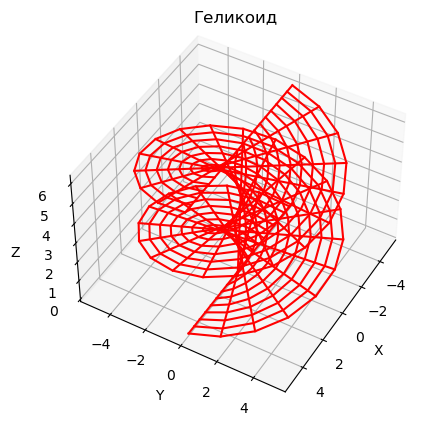

In [108]:
# Бонус 1

# Параметры геликоида
h = 1 # Масштабный коэффициент для оси Z
u_min = -5
u_max = 5
v_min = 0
v_max = 2 * np.pi
num_u = 20 # Количество линий по u
num_v = 20 # Количество линий по v

# Создаем сетку для параметров u и v
u = np.linspace(u_min, u_max, num_u)
v = np.linspace(v_min, v_max, num_v)

# Создаем 3D-график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Рисуем линии по u (широте)
for i in range(num_u):
    x = u[i] * np.cos(v)
    y = u[i] * np.sin(v)
    z = h * v
    ax.plot(x, y, z, color='red')

# Рисуем линии по v (долготе)
for i in range(num_v):
    x = u * np.cos(v[i])
    y = u * np.sin(v[i])
    z = h * v[i]
    ax.plot(x, y, z, color='red')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Геликоид')

ax.view_init(azim=30, elev=45)

plt.show()


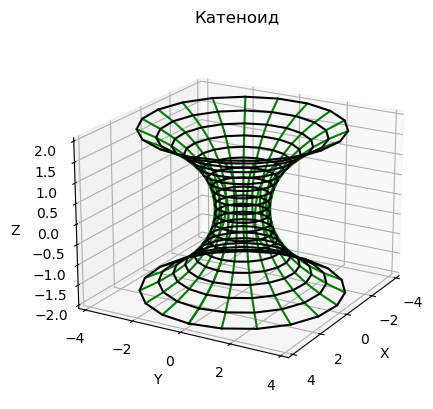

In [104]:
# Бонус 2

# Параметры катеноида
u_min = -2
u_max = 2
v_min = 0
v_max = 2 * np.pi
num_u = 20 # Количество линий по u
num_v = 20 # Количество линий по v

# Создаем сетку для параметров u и v
u = np.linspace(u_min, u_max, num_u)
v = np.linspace(v_min, v_max, num_v)
u, v = np.meshgrid(u, v)

# Вычисляем координаты x, y, z
x = np.cosh(u) * np.cos(v)
y = np.cosh(u) * np.sin(v)
z = u

# Создаем 3D-график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Рисуем линии по u (широте)
for i in range(num_u):
    ax.plot(x[i, :], y[i, :], z[i, :], color='green')

# Рисуем линии по v (долготе)
for i in range(num_v):
    ax.plot(x[:, i], y[:, i], z[:, i], color='black')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Катеноид')

# Фиксируем углы обзора
ax.view_init(azim=30, elev=20)

plt.show()


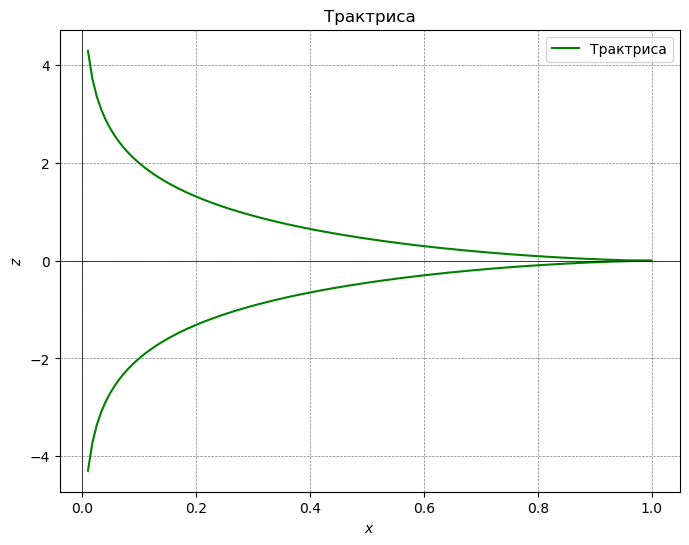

In [105]:

# Задаем параметры
a = 1  # Константа
u = np.linspace(0.01, np.pi - 0.01, 400)  # Параметр, избегаем 0 и π чтобы избежать разрывов

# Параметрические уравнения трактрисы
x = a * np.sin(u)
z = a * (np.log(np.tan(u / 2)) + np.cos(u))

# Создание фигуры и осей для 2D графика
fig, ax = plt.subplots(figsize=(8, 6))

# Построение трактрисы
ax.plot(x, z, label='Трактриса', color='green')
ax.set_xlabel('$x$')
ax.set_ylabel('$z$')
ax.set_title('Трактрисa')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.legend()

plt.show()


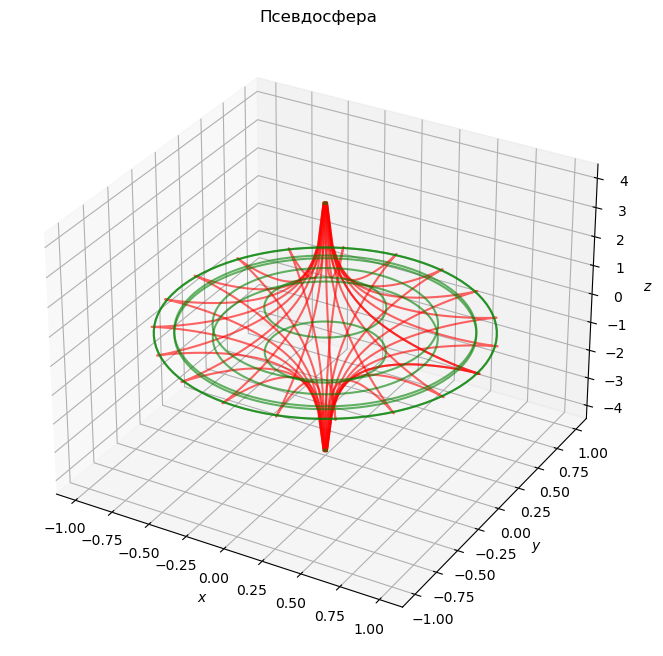

In [106]:

# Параметры
a = 1
u = np.linspace(0.01, np.pi - 0.01, 100)  # Параметр u
v = np.linspace(0, 2 * np.pi, 100)  # Параметр v

# Построение меридиан и параллелей
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение меридиан (вдоль оси z)
for phi in np.linspace(0, 2 * np.pi, 20):
    x_meridian = a * np.sin(u) * np.cos(phi)
    y_meridian = a * np.sin(u) * np.sin(phi)
    z_meridian = a * (np.log(np.tan(u / 2)) + np.cos(u))
    ax.plot(x_meridian, y_meridian, z_meridian, color='red', alpha=0.6)

# Построение параллелей (вдоль оси x и y)
for theta in np.linspace(0.01, np.pi - 0.01, 10):
    x_parallel = a * np.sin(theta) * np.cos(v)
    y_parallel = a * np.sin(theta) * np.sin(v)
    z_parallel = a * (np.log(np.tan(theta / 2)) + np.cos(theta))
    ax.plot(x_parallel, y_parallel, z_parallel, color='green', alpha=0.6)

# Настройка осей и заголовка
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Псевдосфера')

plt.show()


In [107]:

# Определение переменных
u, v, a = sp.symbols('u v a')
du, dv = sp.symbols('du dv')

# Изначальные коэффициенты первой квадратичной формы
E_initial = a**2 * (2 * sp.cos(u) + 1 + sp.cos(u)**2 / sp.sin(u / 2)**2) * sp.cos(u)**2 / (sp.cos(u) + 1)**2
G_initial = a**2 * sp.sin(u)**2

# Упрощение E_initial
E_simplified = sp.simplify(E_initial)

# Упрощенные коэффициенты первой квадратичной формы
E = a**2 * sp.cot(u)**2
F = 0
G = a**2 * sp.sin(u)**2

# Первая квадратичная форма ds^2
ds2 = E * du**2 + 2 * F * du * dv + G * dv**2

# Вывод результатов
print("Изначальные коэффициенты первой квадратичной формы:")
print("E_initial:")
sp.pretty_print(E_initial)
print("G_initial:")
sp.pretty_print(G_initial)

print("\nУпрощенный E_initial:")
sp.pretty_print(E_simplified)

print("\nУпрощенные коэффициенты первой квадратичной формы:")
print("E:")
sp.pretty_print(E)
print("F:", F)
print("G:")
sp.pretty_print(G)

print("\nПервая квадратичная форма ds^2:")
sp.pretty_print(ds2)


Изначальные коэффициенты первой квадратичной формы:
E_initial:
   ⎛                  2   ⎞        
 2 ⎜               cos (u)⎟    2   
a ⋅⎜2⋅cos(u) + 1 + ───────⎟⋅cos (u)
   ⎜                  2⎛u⎞⎟        
   ⎜               sin ⎜─⎟⎟        
   ⎝                   ⎝2⎠⎠        
───────────────────────────────────
                       2           
           (cos(u) + 1)            
G_initial:
 2    2   
a ⋅sin (u)

Упрощенный E_initial:
    2  
   a   
───────
   2   
tan (u)

Упрощенные коэффициенты первой квадратичной формы:
E:
 2    2   
a ⋅cot (u)
F: 0
G:
 2    2   
a ⋅sin (u)

Первая квадратичная форма ds^2:
 2   2    2       2   2    2   
a ⋅du ⋅cot (u) + a ⋅dv ⋅sin (u)


#### На вычисление второй квадратичной формы в программном виде, автора репозитория не хватило. Он был при смерти, вычисляя это на бумаге и получив вычисления размером в три листа, решил не рисковать оставшимися нервными клетками.

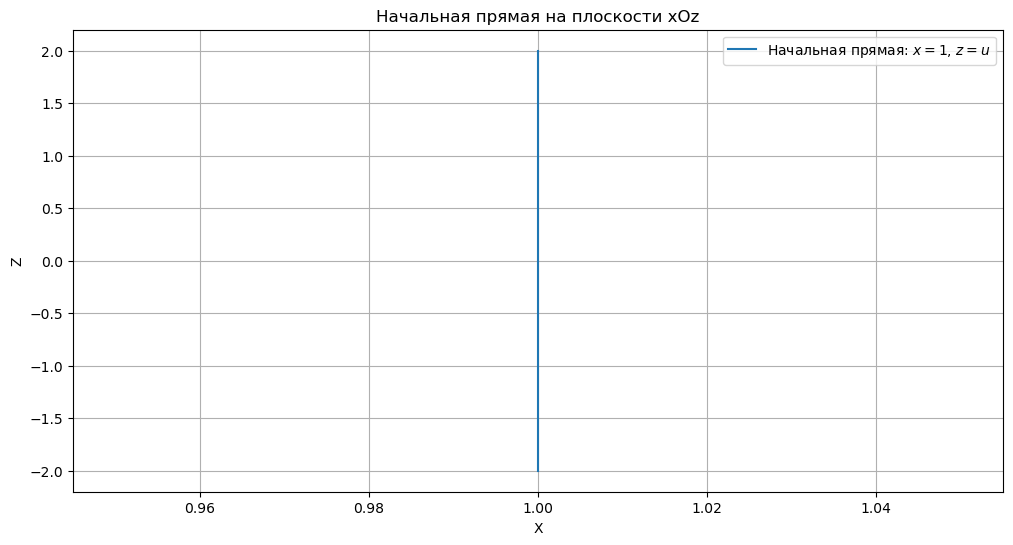

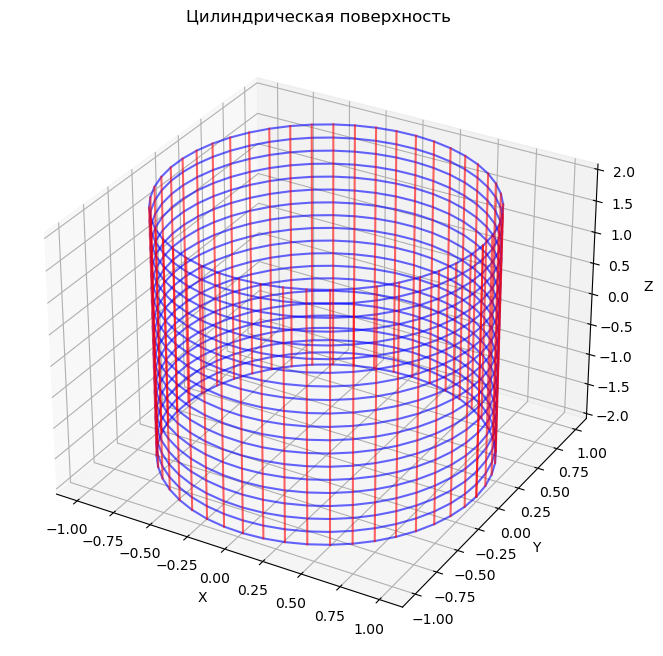

In [100]:

# Параметры для начальной прямой
a = 1  # Параметр a задает постоянное значение x
u = np.linspace(-2, 2, 100)  # Параметр u, задающий координату z

# Значения x и z для начальной прямой
x_initial = np.full_like(u, a)  # x всегда равно a
z_initial = u

# Создание фигуры и осей для 2D графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Подграфик 1: Начальная прямая
ax1.plot(x_initial, z_initial, label=f'Начальная прямая: $x = {a}$, $z = u$')
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_title('Начальная прямая на плоскости xOz')
ax1.grid(True)
ax1.legend()

# Шаг 2: Вращение прямой и построение поверхности
# Параметры цилиндра
a = 1  # Радиус цилиндра
u = np.linspace(-2, 2, 20)  # Параметр, задающий высоту цилиндра
v = np.linspace(0, 2 * np.pi, 50)  # Угол для вращения

# Создание сетки параметров
U, V = np.meshgrid(u, v)

# Координаты для боковой поверхности цилиндра
X = a * np.cos(V)
Y = a * np.sin(V)
Z = U

# Создание фигуры и 3D осей
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')

# Рисуем боковую поверхность цилиндра (линии вдоль параметра v)
for i in range(len(u)):
    ax2.plot(X[:, i], Y[:, i], Z[:, i], color='blue', alpha=0.6)

# Рисуем круговые основания (линии вдоль параметра u)
for j in range(len(v)):
    ax2.plot(a * np.cos(v[j]) * np.ones_like(u), a * np.sin(v[j]) * np.ones_like(u), u, color='red', alpha=0.6)

# Настройка осей и меток
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Цилиндрическая поверхность')

plt.show()


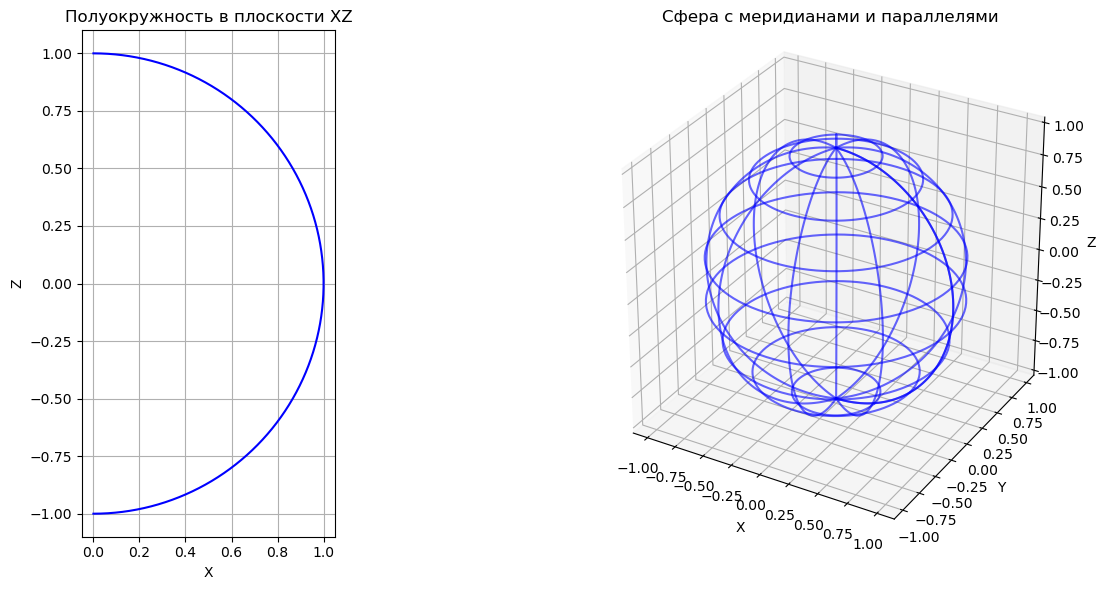

In [101]:


# Параметры
R = 1  # Радиус

# Полуокружность
u = np.linspace(-np.pi/2, np.pi/2, 100)
x_half_circle = R * np.cos(u)
z_half_circle = R * np.sin(u)

# Вращение полуокружности для получения сферы
u_sphere = np.linspace(-np.pi/2, np.pi/2, 100)
v_sphere = np.linspace(0, 2 * np.pi, 100)
U, V = np.meshgrid(u_sphere, v_sphere)
X_sphere = R * np.cos(U) * np.cos(V)
Y_sphere = R * np.cos(U) * np.sin(V)
Z_sphere = R * np.sin(U)

# Создание фигуры и осей для полуокружности
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121)
ax1.plot(x_half_circle, z_half_circle, color='blue')
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
ax1.set_title('Полуокружность в плоскости XZ')
ax1.grid(True)
ax1.set_aspect('equal', adjustable='box')

# Создание фигуры и 3D осей для сферы
ax2 = fig.add_subplot(122, projection='3d')

# Рисуем параллели (линии широты)
for u_val in np.linspace(-np.pi/2, np.pi/2, 10):
    x_parallel = R * np.cos(u_val) * np.cos(v_sphere)
    y_parallel = R * np.cos(u_val) * np.sin(v_sphere)
    z_parallel = R * np.sin(u_val)
    ax2.plot(x_parallel, y_parallel, z_parallel, color='blue', alpha=0.6)

# Рисуем меридианы (линии долготы)
for v_val in np.linspace(0, 2 * np.pi, 10):
    x_meridian = R * np.cos(u_sphere) * np.cos(v_val)
    y_meridian = R * np.cos(u_sphere) * np.sin(v_val)
    z_meridian = R * np.sin(u_sphere)
    ax2.plot(x_meridian, y_meridian, z_meridian, color='blue', alpha=0.6)

# Настройка осей и меток
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Сфера с меридианами и параллелями')
ax2.set_box_aspect([1, 1, 1])  # Установить равные масштабы для всех осей

# Показать графики
plt.tight_layout()
plt.show()
